# <center>Analysis of Twitter Chatbot_Dataset Sample</center>

## Headers_Clarification

The header for column A, this header is blank. However, I assume it is the total of tweets in ascending order.  
The header for column B, author_id, includes the identity of the person inializing the tweet.  
The header for column C, inbound, notifies whether the tweet was inbound or outbound. If Inbound, a boolean variable of true is displayed. If Outbound, a boolean variable of false is displayed.  
The header for column D, created_at, includes the date and time the tweet was created.  
The header for column E, text, includes the actual tweet message.  
The header for column F, response_tweet_id, includes the conversation_id of the original tweet.  
The header for column G, the in_response_to_tweet_id, includes a defined conversation_id on each reply, which matches the Tweet ID of the original Tweet that started the conversation.

## Data_Clarification

Chatbots are AI-based virtual assistant applications developed to answer the questions of the customers on a specific topics or field. These applications are used by the companies to assist their large group of customers without any human. And to train such chatbots, huge quantity of training datasets is required for the machine learning chatbot algorithms, so that model can learn from the datasets and answer the questions when used in real-life.

The Twitter Chatbot is used to communicate with humans in texts. This AI-based application can assist a large number of people with answering their queries from relevant topics.

The Twitter Chatbot Data is used with natural language processing (NLP) to make it understandable to machine through certain algorithms. 

Each tweet is annotated with added metadata to make the sentence or language understandable to machine. And when different types of communication data sets are annotated or labeled it becomes training data sets. 

Brown, R. (2020, May 7). What is Chatbot Training Data & Why You Need High-quality Datasets?
https://chatbotslife.com/what-is-chatbot-training-data-why-you-need-high-quality-datasets-b0636ef9b1b1

There are several steps involved in data analysis. The first step is to explore and visualize the data to identify areas that need further evaluation. This process is called Data Exploration. During this process, the user can get a better understanding of the data so they are able to build efficient and predictive models. 

# <center>Python Interactive Dashboard</center>

In [1]:
import param
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
import string
from pandas import DataFrame
from pandas import Series

   #####    Capston uploaded on GitHub : https://github.com/Machine34/Analysis-of-Twitter-Chatbot_Dataset-Sample.ipynb

In [2]:
# import .csv file 
df = pd.read_csv('twcs.csv')

In [3]:
# Observe the dataset by checking the rows using the head() method. Put number of rows in parenthesis to observe all
df.head(1048576)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 16:30:49 +0000 2017,When @Morrisons does you good 🙌 https://t.co/6...,"116,052,511,605,271,000,000",NaN
1048571,1160529,Morrisons,False,Tue Oct 24 16:40:49 +0000 2017,@393038 ... Along with your More card and addr...,NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 16:04:48 +0000 2017,@Morrisons https://t.co/mnGeW3E7N8,1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 16:04:13 +0000 2017,"@Morrisons watford, bought crayfish tails the ...","11,605,301,160,532",NaN


# Lower casing

In [4]:
# Lower casing
df['text']=df['text'].str.lower()

In [5]:
df.head(1048576)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 i understand. i would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare i have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 please send us a private message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare i did.,4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 16:30:49 +0000 2017,when @morrisons does you good 🙌 https://t.co/6...,"116,052,511,605,271,000,000",NaN
1048571,1160529,Morrisons,False,Tue Oct 24 16:40:49 +0000 2017,@393038 ... along with your more card and addr...,NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 16:04:48 +0000 2017,@morrisons https://t.co/mngew3e7n8,1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 16:04:13 +0000 2017,"@morrisons watford, bought crayfish tails the ...","11,605,301,160,532",NaN


# Remove punctuations

In [6]:
#Remove punctuation from multiple columns in Pandas Dataframe

def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass
    return x

df.apply(remove_punctuation)


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 221047 0000 2017,115712 i understand i would like to assist you...,2,3.0
1,2,115712,True,Tue Oct 31 221145 0000 2017,sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 220827 0000 2017,sprintcare i have sent several private message...,1,4.0
3,4,sprintcare,False,Tue Oct 31 215449 0000 2017,115712 please send us a private message so tha...,3,5.0
4,5,115712,True,Tue Oct 31 214935 0000 2017,sprintcare i did,4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 163049 0000 2017,when morrisons does you good httpstco6iezzbmhmn,116052511605271000000,NaN
1048571,1160529,Morrisons,False,Tue Oct 24 164049 0000 2017,393038 along with your more card and address ...,NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 160448 0000 2017,morrisons httpstcomngew3e7n8,1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 160413 0000 2017,morrisons watford bought crayfish tails the ot...,11605301160532,NaN


## Remove stop words NLTK Natural Language Toolkit

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
#Remove Stop Words from Text in DataFrame Column using NLTK (Natural Language Toolkit) 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
stop_words=set(stopwords.words('english'))                                                          


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bjsav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def remove_stop(x):
    return ",".join([word for word in str(x).split() if word not in stop_words])
df['text'] = df['text'].apply(lambda x: remove_stop(x))    

In [10]:
df.head(1048576)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,"@115712,understand.,would,like,assist,you.,wou...",2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,"@sprintcare,propose",NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,"@sprintcare,sent,several,private,messages,one,...",1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,"@115712,please,send,us,private,message,assist,...",3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,"@sprintcare,did.",4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 16:30:49 +0000 2017,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000",NaN
1048571,1160529,Morrisons,False,Tue Oct 24 16:40:49 +0000 2017,"@393038,...,along,card,address,details,get,sor...",NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 16:04:48 +0000 2017,"@morrisons,https://t.co/mngew3e7n8",1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 16:04:13 +0000 2017,"@morrisons,watford,,bought,crayfish,tails,day....","11,605,301,160,532",NaN


# Remove Punctuation

In [11]:
#Remove punctuation from multiple columns in Pandas Dataframe

def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass
    return x

df.apply(remove_punctuation)


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 221047 0000 2017,115712understandwouldlikeassistyouwouldneedget...,2,3.0
1,2,115712,True,Tue Oct 31 221145 0000 2017,sprintcarepropose,NaN,1.0
2,3,115712,True,Tue Oct 31 220827 0000 2017,sprintcaresentseveralprivatemessagesonerespond...,1,4.0
3,4,sprintcare,False,Tue Oct 31 215449 0000 2017,115712pleasesendusprivatemessageassistyouclick...,3,5.0
4,5,115712,True,Tue Oct 31 214935 0000 2017,sprintcaredid,4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 163049 0000 2017,morrisonsgoodhttpstco6iezzbmhmn,116052511605271000000,NaN
1048571,1160529,Morrisons,False,Tue Oct 24 164049 0000 2017,393038alongcardaddressdetailsgetsortedyouthank...,NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 160448 0000 2017,morrisonshttpstcomngew3e7n8,1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 160413 0000 2017,morrisonswatfordboughtcrayfishtailsdayeatbyhtt...,11605301160532,NaN


# Removal of frequent words

In [12]:
from collections import Counter
cnt = Counter()

for text in df['text'].values:
    for word in text.split():
        cnt[word]+=1
cnt.most_common(10)

[('@uber_support,__email__', 136),
 ('@amazonhelp', 125),
 ('@amazonhelp,yes', 108),
 ('@verizonsupport,yes', 103),
 ('@applesupport,yes', 96),
 ('@amazonhelp,done', 91),
 ('@applesupport', 89),
 ('@safaricom_care,thanks', 78),
 ('@amazonhelp,thank', 75),
 ('@amazonhelp,thanks', 75)]

In [13]:
freq_words=set([w for (w, wc) in cnt.most_common(10)])

In [14]:
freq_words

{'@amazonhelp',
 '@amazonhelp,done',
 '@amazonhelp,thank',
 '@amazonhelp,thanks',
 '@amazonhelp,yes',
 '@applesupport',
 '@applesupport,yes',
 '@safaricom_care,thanks',
 '@uber_support,__email__',
 '@verizonsupport,yes'}

In [15]:
def remove_freq(x):
    return " ".join([word for word in str(x).split() if word not in freq_words])

df['text'] = df['text'].apply(lambda x: remove_freq(x))

In [16]:
df.head(1048576)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,"@115712,understand.,would,like,assist,you.,wou...",2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,"@sprintcare,propose",NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,"@sprintcare,sent,several,private,messages,one,...",1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,"@115712,please,send,us,private,message,assist,...",3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,"@sprintcare,did.",4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 16:30:49 +0000 2017,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000",NaN
1048571,1160529,Morrisons,False,Tue Oct 24 16:40:49 +0000 2017,"@393038,...,along,card,address,details,get,sor...",NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 16:04:48 +0000 2017,"@morrisons,https://t.co/mngew3e7n8",1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 16:04:13 +0000 2017,"@morrisons,watford,,bought,crayfish,tails,day....","11,605,301,160,532",NaN


# Remove Punctuation

In [17]:
#Remove punctuation from multiple columns in Pandas Dataframe

def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass
    return x

df.apply(remove_punctuation)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 221047 0000 2017,115712understandwouldlikeassistyouwouldneedget...,2,3.0
1,2,115712,True,Tue Oct 31 221145 0000 2017,sprintcarepropose,NaN,1.0
2,3,115712,True,Tue Oct 31 220827 0000 2017,sprintcaresentseveralprivatemessagesonerespond...,1,4.0
3,4,sprintcare,False,Tue Oct 31 215449 0000 2017,115712pleasesendusprivatemessageassistyouclick...,3,5.0
4,5,115712,True,Tue Oct 31 214935 0000 2017,sprintcaredid,4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 163049 0000 2017,morrisonsgoodhttpstco6iezzbmhmn,116052511605271000000,NaN
1048571,1160529,Morrisons,False,Tue Oct 24 164049 0000 2017,393038alongcardaddressdetailsgetsortedyouthank...,NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 160448 0000 2017,morrisonshttpstcomngew3e7n8,1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 160413 0000 2017,morrisonswatfordboughtcrayfishtailsdayeatbyhtt...,11605301160532,NaN


# Listing tweets by date

In [18]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series


In [19]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

In [20]:
# convert column 'created_at' from text format to python's datetime format.
df['created_at'] = pd.to_datetime(df['created_at'])


In [21]:
# Verifying column 'created_at' was converted to datetime format
df.dtypes[:8]

tweet_id                                 int64
author_id                               object
inbound                                   bool
created_at                 datetime64[ns, UTC]
text                                    object
response_tweet_id                       object
in_response_to_tweet_id                float64
dtype: object

In [22]:
# Set the index to 'created_at a variable
df = df.set_index(['created_at'])
df.head(1048576)

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
created_at,,,,,,
2017-10-31 22:10:47+00:00,1,sprintcare,False,"@115712,understand.,would,like,assist,you.,wou...",2,3.0
2017-10-31 22:11:45+00:00,2,115712,True,"@sprintcare,propose",NaN,1.0
2017-10-31 22:08:27+00:00,3,115712,True,"@sprintcare,sent,several,private,messages,one,...",1,4.0
2017-10-31 21:54:49+00:00,4,sprintcare,False,"@115712,please,send,us,private,message,assist,...",3,5.0
2017-10-31 21:49:35+00:00,5,115712,True,"@sprintcare,did.",4,6.0
...,...,...,...,...,...,...
2017-10-24 16:30:49+00:00,1160526,122264,True,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000",NaN
2017-10-24 16:40:49+00:00,1160529,Morrisons,False,"@393038,...,along,card,address,details,get,sor...",NaN,1160530.0
2017-10-24 16:04:48+00:00,1160530,393038,True,"@morrisons,https://t.co/mngew3e7n8",1160529,1160531.0


In [23]:
# accessing only the day/month/year in the created_at column
def daily_count(x):
    daily_count = df.groupby(df.index.date).apply(X)
    
df.head(1048576)

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
created_at,,,,,,
2017-10-31 22:10:47+00:00,1,sprintcare,False,"@115712,understand.,would,like,assist,you.,wou...",2,3.0
2017-10-31 22:11:45+00:00,2,115712,True,"@sprintcare,propose",NaN,1.0
2017-10-31 22:08:27+00:00,3,115712,True,"@sprintcare,sent,several,private,messages,one,...",1,4.0
2017-10-31 21:54:49+00:00,4,sprintcare,False,"@115712,please,send,us,private,message,assist,...",3,5.0
2017-10-31 21:49:35+00:00,5,115712,True,"@sprintcare,did.",4,6.0
...,...,...,...,...,...,...
2017-10-24 16:30:49+00:00,1160526,122264,True,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000",NaN
2017-10-24 16:40:49+00:00,1160529,Morrisons,False,"@393038,...,along,card,address,details,get,sor...",NaN,1160530.0
2017-10-24 16:04:48+00:00,1160530,393038,True,"@morrisons,https://t.co/mngew3e7n8",1160529,1160531.0


# Dataframe Information

In [24]:
# print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2017-10-31 22:10:47+00:00 to 2017-10-24 16:39:12+00:00
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tweet_id                 1048575 non-null  int64  
 1   author_id                1048575 non-null  object 
 2   inbound                  1048575 non-null  bool   
 3   text                     1048575 non-null  object 
 4   response_tweet_id        683860 non-null   object 
 5   in_response_to_tweet_id  767999 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 49.0+ MB


# Dataframe Statistics

In [25]:
# use describe() method to show basic statistical characteristics of each numerical feature
df.describe()

,tweet_id,in_response_to_tweet_id
count,1.048575e+06,7.679990e+05
mean,5.851802e+05,5.781865e+05
std,3.325607e+05,3.344554e+05
min,1.000000e+00,1.000000e+00
25%,2.959935e+05,2.853185e+05
50%,5.840990e+05,5.739510e+05
75%,8.736605e+05,8.688855e+05
max,1.160532e+06,1.160531e+06


# Missing Values

In [26]:
print('Number of missing values in each column')
print(df.isnull().sum()) 

Number of missing values in each column
tweet_id                        0
author_id                       0
inbound                         0
text                            0
response_tweet_id          364715
in_response_to_tweet_id    280576
dtype: int64


In [27]:
# filling the missing values.
df.fillna(df.median(),inplace=True)

In [28]:
# Observe the dataset by checking the rows using the head() method. Put number of rows in parenthesis to observe all
df.head(1048576)

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
created_at,,,,,,
2017-10-31 22:10:47+00:00,1,sprintcare,False,"@115712,understand.,would,like,assist,you.,wou...",2,3.0
2017-10-31 22:11:45+00:00,2,115712,True,"@sprintcare,propose",NaN,1.0
2017-10-31 22:08:27+00:00,3,115712,True,"@sprintcare,sent,several,private,messages,one,...",1,4.0
2017-10-31 21:54:49+00:00,4,sprintcare,False,"@115712,please,send,us,private,message,assist,...",3,5.0
2017-10-31 21:49:35+00:00,5,115712,True,"@sprintcare,did.",4,6.0
...,...,...,...,...,...,...
2017-10-24 16:30:49+00:00,1160526,122264,True,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000",573951.0
2017-10-24 16:40:49+00:00,1160529,Morrisons,False,"@393038,...,along,card,address,details,get,sor...",NaN,1160530.0
2017-10-24 16:04:48+00:00,1160530,393038,True,"@morrisons,https://t.co/mngew3e7n8",1160529,1160531.0


In [29]:
print('Number of missing values in each column')
print(df.isnull().sum()) 

Number of missing values in each column
tweet_id                        0
author_id                       0
inbound                         0
text                            0
response_tweet_id          364715
in_response_to_tweet_id         0
dtype: int64


# Deleting null data

In [30]:
# Dropping off the null data
df.dropna().head(1048576)

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
created_at,,,,,,
2017-10-31 22:10:47+00:00,1,sprintcare,False,"@115712,understand.,would,like,assist,you.,wou...",2,3.0
2017-10-31 22:08:27+00:00,3,115712,True,"@sprintcare,sent,several,private,messages,one,...",1,4.0
2017-10-31 21:54:49+00:00,4,sprintcare,False,"@115712,please,send,us,private,message,assist,...",3,5.0
2017-10-31 21:49:35+00:00,5,115712,True,"@sprintcare,did.",4,6.0
2017-10-31 21:46:24+00:00,6,sprintcare,False,"@115712,please,send,us,private,message,,gain,d...","5,7",8.0
...,...,...,...,...,...,...
2017-10-15 20:30:56+00:00,1160522,393037,True,"@applesupport,photos,take,much,space,phone,the...",1160524,1160521.0
2017-10-15 18:49:27+00:00,1160523,393037,True,"@applesupport,need,help,icloud,photo,library",1160521,573951.0
2017-10-24 16:30:49+00:00,1160526,122264,True,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000",573951.0


In [31]:
print('Number of missing values in each column')
print(df.isnull().sum()) 

Number of missing values in each column
tweet_id                        0
author_id                       0
inbound                         0
text                            0
response_tweet_id          364715
in_response_to_tweet_id         0
dtype: int64


# Checking duplicated values

In [32]:
# checking for duplicate values
duplicatedValues = df.duplicated()
print(duplicatedValues.sum())
df[duplicatedValues]

0


,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
created_at,,,,,,


No duplicate values were found

# Remove irrelevant data with Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

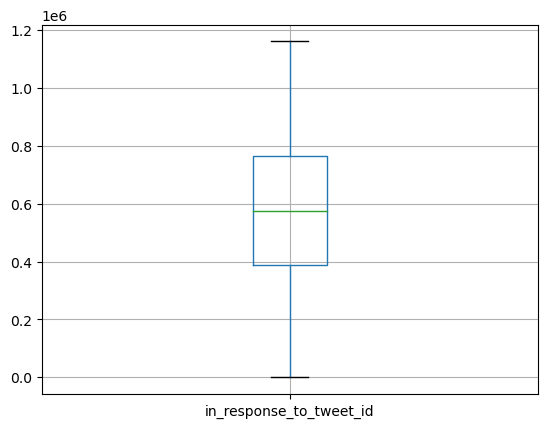

In [33]:
# Handling Outliers in the data. Finding Outliers in the data using boxplot
df.boxplot(column=['in_response_to_tweet_id'])
plt.show

# Check Inbound column for number of accurate inbound tweets

In [34]:
# checking for number of Inbound rows = true
df.inbound[df.inbound == True].count()

574752

In [35]:
# checking for number of Inbound rows = false
df.inbound[df.inbound == False].count()

473823

# Top 20 tweeters

In [36]:
# groupby top 20 tweeters
df.groupby('author_id').head(20).reset_index(drop=True)

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,"@115712,understand.,would,like,assist,you.,wou...",2,3.0
1,2,115712,True,"@sprintcare,propose",NaN,1.0
2,3,115712,True,"@sprintcare,sent,several,private,messages,one,...",1,4.0
3,4,sprintcare,False,"@115712,please,send,us,private,message,assist,...",3,5.0
4,5,115712,True,"@sprintcare,did.",4,6.0
...,...,...,...,...,...,...
569008,1160522,393037,True,"@applesupport,photos,take,much,space,phone,the...",1160524,1160521.0
569009,1160523,393037,True,"@applesupport,need,help,icloud,photo,library",1160521,573951.0
569010,1160526,122264,True,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000",573951.0
569011,1160530,393038,True,"@morrisons,https://t.co/mngew3e7n8",1160529,1160531.0


# Top 20 tweets

In [37]:
# groupby top 20 unique tweets 
df.groupby('text').head(20).reset_index(drop=True)

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,"@115712,understand.,would,like,assist,you.,wou...",2,3.0
1,2,115712,True,"@sprintcare,propose",NaN,1.0
2,3,115712,True,"@sprintcare,sent,several,private,messages,one,...",1,4.0
3,4,sprintcare,False,"@115712,please,send,us,private,message,assist,...",3,5.0
4,5,115712,True,"@sprintcare,did.",4,6.0
...,...,...,...,...,...,...
1046321,1160526,122264,True,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000",573951.0
1046322,1160529,Morrisons,False,"@393038,...,along,card,address,details,get,sor...",NaN,1160530.0
1046323,1160530,393038,True,"@morrisons,https://t.co/mngew3e7n8",1160529,1160531.0
1046324,1160531,393038,True,"@morrisons,watford,,bought,crayfish,tails,day....","11,605,301,160,532",573951.0


# Join Columns

In [38]:
#Join columns: select columns called 'text' and 'response_tweet_id'
df_new = df[['text', 'response_tweet_id']]

#view new DataFrame
df_new

,text,response_tweet_id
created_at,,
2017-10-31 22:10:47+00:00,"@115712,understand.,would,like,assist,you.,wou...",2
2017-10-31 22:11:45+00:00,"@sprintcare,propose",NaN
2017-10-31 22:08:27+00:00,"@sprintcare,sent,several,private,messages,one,...",1
2017-10-31 21:54:49+00:00,"@115712,please,send,us,private,message,assist,...",3
2017-10-31 21:49:35+00:00,"@sprintcare,did.",4
...,...,...
2017-10-24 16:30:49+00:00,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000"
2017-10-24 16:40:49+00:00,"@393038,...,along,card,address,details,get,sor...",NaN
2017-10-24 16:04:48+00:00,"@morrisons,https://t.co/mngew3e7n8",1160529


# Top twitter users by number of tweets

In [39]:
#Join columns: select columns called 'text' and 'tweet_id'
df_new = df[['text', 'tweet_id']]

# using rank method to show top 20 twitter users by number of tweets ('text' and tweet_id')
df['Rank_by_text'] =  df['tweet_id'].rank(ascending=False)

#view new DataFrame
df_new

,text,tweet_id
created_at,,
2017-10-31 22:10:47+00:00,"@115712,understand.,would,like,assist,you.,wou...",1
2017-10-31 22:11:45+00:00,"@sprintcare,propose",2
2017-10-31 22:08:27+00:00,"@sprintcare,sent,several,private,messages,one,...",3
2017-10-31 21:54:49+00:00,"@115712,please,send,us,private,message,assist,...",4
2017-10-31 21:49:35+00:00,"@sprintcare,did.",5
...,...,...
2017-10-24 16:30:49+00:00,"@morrisons,good,🙌,https://t.co/6iezzbmhmn",1160526
2017-10-24 16:40:49+00:00,"@393038,...,along,card,address,details,get,sor...",1160529
2017-10-24 16:04:48+00:00,"@morrisons,https://t.co/mngew3e7n8",1160530


# Top Authors by response

In [40]:
#Join columns: select columns called 'text' and 'response_tweet_id'
df_new = df[['author_id', 'response_tweet_id']]

# using rank method to show top Authors by response ('author_id','response_tweet_id')
df['Rank_by_author_id'] =  df['response_tweet_id'].rank(ascending=False)

#view new DataFrame
df_new


,author_id,response_tweet_id
created_at,,
2017-10-31 22:10:47+00:00,sprintcare,2
2017-10-31 22:11:45+00:00,115712,NaN
2017-10-31 22:08:27+00:00,115712,1
2017-10-31 21:54:49+00:00,sprintcare,3
2017-10-31 21:49:35+00:00,115712,4
...,...,...
2017-10-24 16:30:49+00:00,122264,"116,052,511,605,271,000,000"
2017-10-24 16:40:49+00:00,Morrisons,NaN
2017-10-24 16:04:48+00:00,393038,1160529
